# IMDB RATINGS SENSITIVITY ANALYSIS USING TOKENIZATION

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
df = pd.read_csv("IMDB_Dataset.csv")

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
# Checking the number of positive and negative comments
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

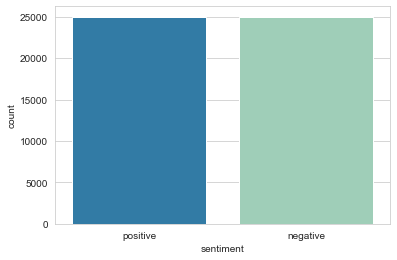

In [5]:
# Plotting a graph for the same
sns.set_style('whitegrid')
sns.countplot(x='sentiment',data=df, palette='YlGnBu_r')

In [6]:
# Convert y values in the form of 0 and 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["sentiment"] = le.fit_transform(df["sentiment"])
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [7]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X = df['review'].values
y = df['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# Splitting of data is done before tokenizing, as the model is better if the train and test tokens are unknown to each other

In [8]:
X_test

array(["I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defe

In [9]:
# Importing Libraries for Tokenizing ans Sequencing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
# Initializa variables
vocab_size = 25000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type ='post'
oov_tok = '<oov>'

In [11]:
# Tokenizing all the sentences into words with indices
tokenizer= Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# We have to ensure that our model only sees the training data and not the testing data, so we fit the tokenizer only on train data.
# This is to ensure an effective model
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
print(word_index)

{'<oov>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'movie': 17, 'with': 18, 'but': 19, 'film': 20, 'on': 21, 'not': 22, 'you': 23, 'are': 24, 'his': 25, 'have': 26, 'be': 27, 'one': 28, 'he': 29, 'all': 30, 'at': 31, 'by': 32, 'an': 33, 'they': 34, 'so': 35, 'from': 36, 'who': 37, 'like': 38, 'or': 39, 'just': 40, 'her': 41, 'out': 42, 'about': 43, 'if': 44, "it's": 45, 'has': 46, 'there': 47, 'some': 48, 'what': 49, 'good': 50, 'very': 51, 'more': 52, 'when': 53, 'up': 54, 'no': 55, 'time': 56, 'my': 57, 'even': 58, 'would': 59, 'she': 60, 'only': 61, 'which': 62, 'story': 63, 'really': 64, 'see': 65, 'their': 66, 'had': 67, 'can': 68, 'me': 69, 'well': 70, 'were': 71, 'much': 72, 'we': 73, 'than': 74, 'bad': 75, 'been': 76, 'do': 77, 'get': 78, 'great': 79, 'will': 80, 'also': 81, 'other': 82, 'into': 83, 'people': 84, 'because': 85, 'how': 86, 'first': 87, 'him': 88, 'most':

In [12]:
# Convert sentences into sequence of tokens like [1,2,3,4]
training_sequences=tokenizer.texts_to_sequences(X_train)
training_padded=pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_sequences=tokenizer.texts_to_sequences(X_test)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
# Padding the sequence of sentences into the same length as the max_length by adding 0s

In [13]:
training_padded

array([[   15,    72,    15, ...,    25, 17368,    19],
       [   12,    14,     4, ...,     3,  5401,  5748],
       [   22,  1446,     2, ...,   724,   483,   132],
       ...,
       [  795,    12,    28, ...,     0,     0,     0],
       [   12,   362,    14, ...,     0,     0,     0],
       [   12,     7,     4, ...,    12,    17,     2]])

In [14]:
testing_padded

array([[   11,    64,   424, ...,  2681, 14954, 14033],
       [   22,   109,   707, ...,  8554,     1,  2615],
       [    2,    20,   940, ...,   198,    69,    48],
       ...,
       [ 1344,   502,    46, ...,     5,    25,     1],
       [   28,     5,     2, ...,   295,   407,     4],
       [  282,    23,    68, ...,     0,     0,     0]])

> **Word Embedding:** Words and associated words are clustered as vectors in a multi-dimensional space. 
Words are present in a sentence and often words with similar meanings are close to each other.

In [15]:

# Building the model with word embedding
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten

In [16]:
# Initialize the model
model = Sequential()

In [17]:
# Add embedding layer

# Embedding is a 2D model with dimensions as embedding_dim and imput_length
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

In [18]:
# Flatten to convert the 2D model into 2D
model.add(Flatten())

In [19]:
# Add hidden layers
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=120,activation='relu'))
model.add(Dropout(0.5))

In [20]:
# Add op layer
model.add(Dense(units=1,activation='sigmoid'))

In [21]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [22]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [23]:
y_train

array([0, 1, 0, ..., 0, 1, 1])

In [24]:
# Fitting/Training the model
hist = model.fit(x=training_padded, y=y_train, batch_size=256, epochs=100, validation_data=(testing_padded, y_test), verbose=1, callbacks=[early_stop]) 

Epoch 1/100
137/137 [==============================] - 3s 15ms/step - loss: 0.6934 - accuracy: 0.5001 - val_loss: 0.6929 - val_accuracy: 0.5127
Epoch 2/100
137/137 [==============================] - 2s 16ms/step - loss: 0.6924 - accuracy: 0.5177 - val_loss: 0.6924 - val_accuracy: 0.5244
Epoch 3/100
137/137 [==============================] - 2s 16ms/step - loss: 0.6909 - accuracy: 0.5365 - val_loss: 0.6911 - val_accuracy: 0.5465
Epoch 4/100
137/137 [==============================] - 2s 15ms/step - loss: 0.6873 - accuracy: 0.5639 - val_loss: 0.6864 - val_accuracy: 0.5899
Epoch 5/100
137/137 [==============================] - 2s 15ms/step - loss: 0.6719 - accuracy: 0.6286 - val_loss: 0.6540 - val_accuracy: 0.6678
Epoch 6/100
137/137 [==============================] - 2s 15ms/step - loss: 0.5818 - accuracy: 0.7300 - val_loss: 0.5028 - val_accuracy: 0.7641
Epoch 7/100
137/137 [==============================] - 2s 15ms/step - loss: 0.4313 - accuracy: 0.8124 - val_loss: 0.4208 - val_accuracy:

In [25]:
# Visualization of loss and accuracy
score = model.evaluate(testing_padded, y_test, batch_size=64, verbose=1)
print('Test accuracy:', score[1])

235/235 [==============================] - 1s 4ms/step - loss: 0.4645 - accuracy: 0.8265
Test accuracy: 0.8264666795730591


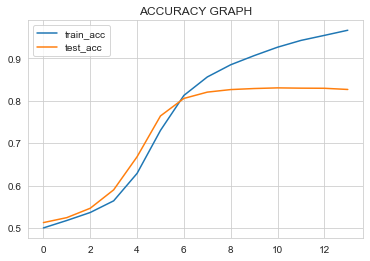

In [26]:
import matplotlib.pyplot as plt

# Accuracy Graph
plt.title("ACCURACY GRAPH")
plt.plot (hist.history['accuracy'], label = "train_acc")
plt.plot (hist.history['val_accuracy'], label = "test_acc")
plt.legend()
plt.show()

In [27]:
# Testing/ Prediction
pred = model.predict(testing_padded)
pred =  pred > 0.5
pred

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [29]:
y_test

array([1, 1, 0, ..., 0, 1, 1])

> In the above given predicted values, we can see that the accuracy is very high

In [41]:
# Testing with individual values
comment = ["Movie is bad"]
comment_seq=tokenizer.texts_to_sequences(comment)
comment_padded=pad_sequences(comment_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
comment_padded

array([[17,  7, 75,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0]])

In [42]:
yp = model.predict(comment_padded)
yp > 0.5

array([[False]])

In [46]:
# Another
comment1 = ["I really liked this movie"]
comment1_seq=tokenizer.texts_to_sequences(comment1)
comment1_padded=pad_sequences(comment1_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
comment1_padded

array([[ 11,  64, 424,  12,  17,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [47]:
yp1 = model.predict(comment1_padded)
yp1 > 0.5

array([[ True]])